In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
mnist= fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
x, y= mnist['data'], mnist['target']

In [4]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


2.0


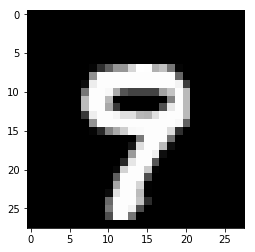

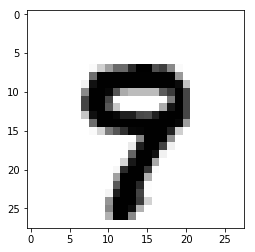

In [5]:
random_digit= x[56000]
random_digit_image=random_digit.reshape([28,28])

print(y[15000])
plt.imshow(random_digit_image, cmap='gray')
plt.show()


plt.imshow(random_digit_image, cmap=matplotlib.cm.binary)
plt.show()


In [6]:
x_train, x_test, y_train, y_test= x[:60000], x[60000:], y[:60000], y[60000:]

In [7]:
shuffle_index= np.random.permutation(60000)

x_train, y_train= x_train[shuffle_index], y_train[shuffle_index]

In [8]:
#binary classifier

y_train_9= (y_train==9) #True for all 9s and False for others
y_test_9= (y_test==9)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=123)
sgd_clf.fit(x_train, y_train_9)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([random_digit])

array([False])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [12]:
skfolds= StratifiedKFold(n_splits=5, random_state=123)

for train_index, test_index in skfolds.split(x_train, y_train_9):
    clone_clf= clone(sgd_clf)
    x_train_folds= x_train[train_index]
    y_train_folds= y_train_9[train_index]
    x_test_folds= x_train[test_index]
    y_test_folds= y_train_9[test_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred= clone_clf.predict(x_test_folds)
    n_correct= sum(y_pred==y_test_folds)
    print(n_correct/len(y_test_folds))

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9091742354803767


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9484166666666667


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9056666666666666


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.935


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9416618051504292


In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_9, cv=5, scoring="accuracy")

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.90917424, 0.94841667, 0.90566667, 0.935     , 0.94166181])

In [14]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x),1), dtype=bool)
    

In [15]:
never_9_clf= Never9Classifier()

cross_val_score(never_9_clf, x_train, y_train_9, cv=5, scoring='accuracy')

array([0.90225   , 0.90016667, 0.89758333, 0.90425   , 0.9       ])

In [16]:
from sklearn.model_selection import cross_val_predict

cross_val_score(sgd_clf, x_train, y_train_9, cv=5, scoring='accuracy')

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.90917424, 0.94841667, 0.90566667, 0.935     , 0.94166181])

In [17]:
from sklearn.metrics import confusion_matrix

y_pred= sgd_clf.predict(x_test)

confusion_matrix(y_test_9, y_pred)

array([[8916,   75],
       [ 585,  424]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test_9, y_pred))
print(recall_score(y_test_9, y_pred))

0.8496993987975952
0.42021803766105054


In [19]:
from sklearn.metrics import f1_score


print(f1_score(y_test_9, y_pred))

0.5623342175066314


In [20]:
y_scores= sgd_clf.decision_function([random_digit])
y_scores

array([-113749.64569737])

In [21]:
threshold=0
y_scores>threshold

array([False])

In [22]:
threshold=220000
y_scores>threshold

array([False])

In [23]:
y_scores= cross_val_predict(sgd_clf, x_train, y_train_9, method='decision_function', cv=3)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

In [25]:
def plot_precision_recall_vs_threshold(precisions, recall, thresholds):
    plt.plot(thresholds, precisions[:-1], label="Precision")
    plt.plot(thresholds, recalls[:-1], label="Recall")
    plt.legend()
    plt.show()

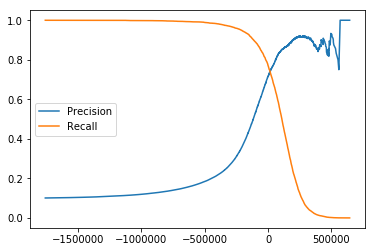

In [26]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

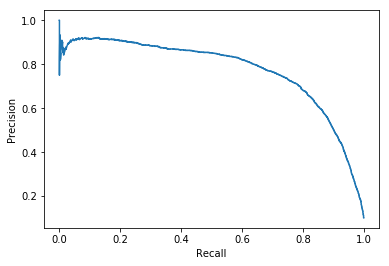

In [33]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    
plot_precision_vs_recall(precisions, recalls)

In [45]:
y_train_pred_90= (y_scores>200000)

In [46]:
print(precision_score(y_train_9, y_train_pred_90))
print(recall_score(y_train_9, y_train_pred_90))

0.9014745308310992
0.22608841822154985


In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds= roc_curve(y_train_9, y_scores)

In [68]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'r--')
    plt.axis([0,1,0,1])
    plt.show()

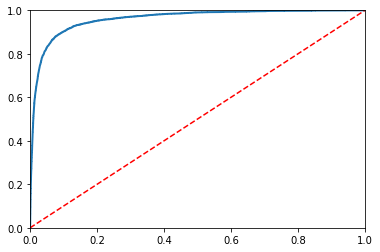

In [69]:
plot_roc_curve(fpr, tpr)

In [70]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_9, y_scores)

0.9599109062554956

In [85]:
from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state=123)
y_probas_forest= cross_val_predict(forest_clf, x_train, y_train_9, cv=3, method='predict_proba')

In [98]:
y_scores_forest=y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_train_9, y_scores_forest)

In [102]:
def plot_roc_curve(fpr, tpr, fpr_forest, tpr_forest):
    plt.plot(fpr, tpr, linewidth=2, label="SGD")
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label="RF")
    plt.plot([0,1],[0,1],'r--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.show()

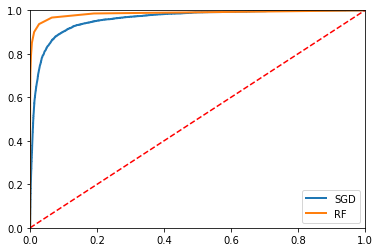

In [103]:
plot_roc_curve(fpr, tpr, fpr_forest, tpr_forest)

In [105]:
roc_auc_score(y_train_9, y_scores_forest)

0.9860743154428973